# Применение K Means для квантования цветов

### Библиотеки


In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### Изображение

In [3]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [7]:
image_as_array.shape # H, W, C

(1401, 934, 3)

In [15]:
image_as_array[0] # RGB-коды пикселей

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [ 23,  63,  98],
       [ 51,  91, 127],
       [ 50,  90, 126]], dtype=uint8)

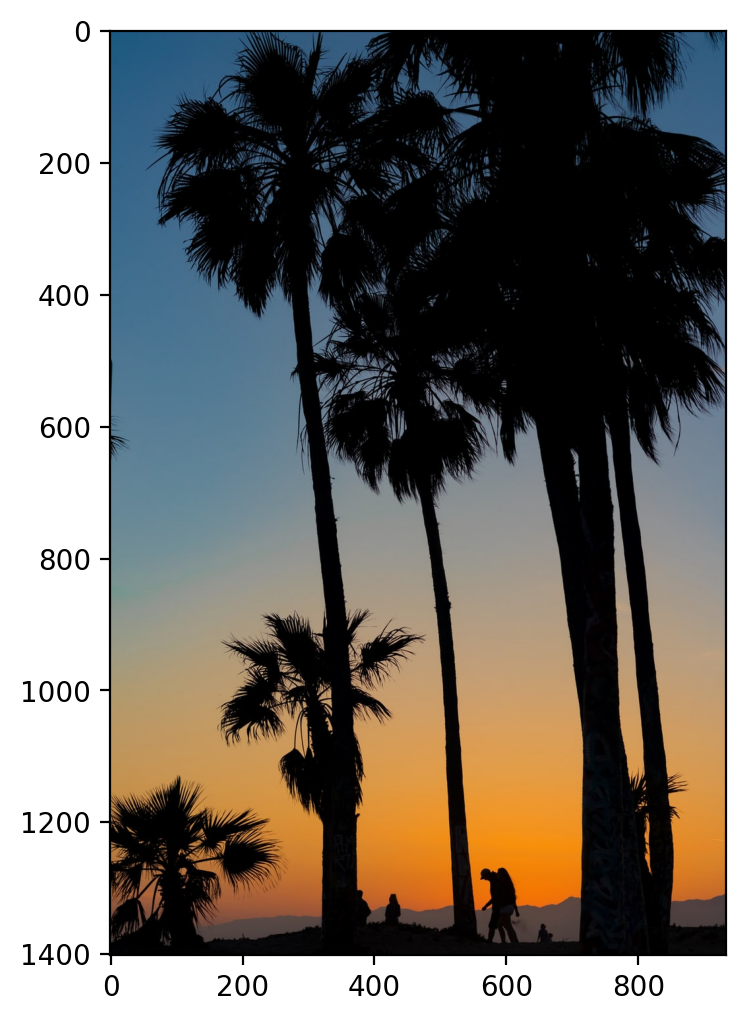

In [16]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow (image_as_array);

### Квантование цветов с помощью Kmeans

Мы уменьшим количество различных цветов до K штук. Оставим всего 6.

* Сейчас у нас трехмерный массив - Высота, Ширина, Цвета.
* Kmeans работает с двумерными данными (строки с данными и колонки с признаками), поэтому:
* Преобразуем массив в двумерный - Высота*Ширина, Цвета.

In [22]:
image_as_array.shape
# h, w, c
# высота, ширина, цвета

(1401, 934, 3)

In [23]:
(h,w,c) = image_as_array.shape

In [24]:
image_as_array2d = image_as_array.reshape(h*w,c)

#### Модель

In [33]:
from sklearn.cluster import KMeans

In [34]:
model = KMeans(n_clusters=6)

In [35]:
model

KMeans(n_clusters=6)

In [36]:
labels = model.fit_predict(image_as_array2d)

In [37]:
labels

array([1, 1, 1, ..., 0, 0, 0])

#### Посмотрим на центры кластеров
* Это будут 6 цветовых RGB-кодов.

In [40]:
model.cluster_centers_

array([[  2.76467992,   2.56402254,   3.67273442],
       [ 71.87832923, 109.68386157, 137.76756387],
       [192.63273603, 154.52457281, 108.32658098],
       [219.08496559, 135.18683863,  46.54494828],
       [ 67.18809328,  61.64494707,  62.01346407],
       [138.36421671, 144.26131638, 143.47166324]])

In [41]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [42]:
rgb_codes

array([[  3,   3,   4],
       [ 72, 110, 138],
       [193, 155, 108],
       [219, 135,  47],
       [ 67,  62,  62],
       [138, 144, 143]])

#### Подставим вместо значений labels кластеров значения rgb_codes

In [43]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [45]:
quantized_image[0]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [ 67,  62,  62],
       [ 72, 110, 138],
       [ 72, 110, 138]])

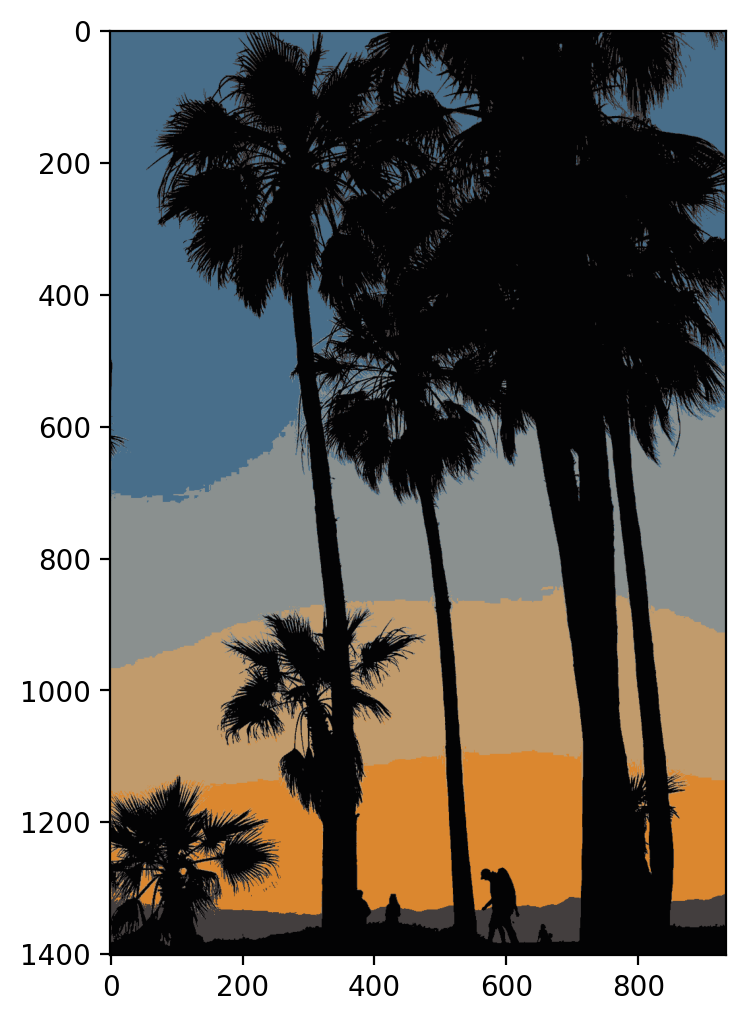

In [46]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image);